In [57]:
from sklearn.datasets import load_iris

data = load_iris()
# x = data['data']
# y = data['target']
#

In [58]:
import torch

from torch.autograd import Variable
import torch.nn.functional as F

%matplotlib inline
import matplotlib.pyplot as plt

#
#
# # x, y = Variable(torch.tensor(x,dtype=torch.float)), Variable(torch.tensor(y,dtype=torch.float))
#
# class NN(torch.nn.Module):
#     def __init__(self,n_input=4, n_output=1):
#         super(NN, self).__init__()
#         self.fc = torch.nn.Linear(n_input,n_output)
#         self.relu = torch.nn.ReLU() # instead of Heaviside step fn
#     def forward(self, x):
#         x = self.fc(x)
#         # print(x)
#         output = self.relu(x) # instead of Heaviside step fn
#         return output
#
# net = NN(n_input=4, n_output=1)
#

In [59]:
# class Trainer:
#     loss_history = []
#     x = None
#     y = None
#     model = None
#
#     def __init__(self,model,epoch,loss_func,optimizer):
#         self.model = model # initialized model
#         self.epoch = epoch
#         self.loss_func = loss_func
#         self.optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
#
#     def fit(self,X,Y):
#         x = Variable(torch.tensor(X,dtype=torch.float))
#         y = Variable(torch.tensor(Y,dtype=torch.float))
#         model = self.model
#         self.loss_history = []
#         for t in range(self.epoch):
#
#             prediction = model(x).squeeze()
#             # print(prediction)
#
#             loss = self.loss_func(prediction, y)
#             self.loss_history.append(loss)
#             print(loss)
#
#             self.optimizer.zero_grad()
#             print(f'Epoch {t}: train loss: {loss}')
#             loss.backward()
#             self.optimizer.step()
#
#
#     def plot_loss_history(self):
#         plt.plot(self.loss_history)
#

In [60]:
# model = NN(n_input=4,n_output=1)
#
# t = Trainer(model=model,epoch=5,loss_func=torch.nn.MSELoss())
#

In [61]:
# t.fit(X=data['data'],Y=data['target'])
#

In [62]:
# t.loss_history

In [82]:

class NN(torch.nn.Module):
    def __init__(self,n_input=4, n_output=1):
        super(NN, self).__init__()
        self.fc = torch.nn.Linear(n_input,n_output)
    def forward(self, x):
        x = self.fc(x)

        return x
net = NN(n_input=4, n_output=1)

model = NN(4, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
epoch=1000

X = data['data']
Y = data['target']
x_train = Variable(torch.tensor(X,dtype=torch.float))
y_train = Variable(torch.tensor(Y,dtype=torch.float))

loss_history = []

for epoch in range(epoch):
    optimizer.zero_grad()

    # Forward
    y_pred = model(x_train)

    # Loss
    loss = criterion(y_pred.squeeze(), y_train)
    loss_history.append(loss)

    print(f'Epoch {epoch}: train loss: {loss.item()}')

    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 0.44461295008659363
Epoch 1: train loss: 0.3108506500720978
Epoch 2: train loss: 0.28323858976364136
Epoch 3: train loss: 0.26372674107551575
Epoch 4: train loss: 0.2461971789598465
Epoch 5: train loss: 0.2301524579524994
Epoch 6: train loss: 0.21544824540615082
Epoch 7: train loss: 0.20197135210037231
Epoch 8: train loss: 0.18961912393569946
Epoch 9: train loss: 0.17829769849777222
Epoch 10: train loss: 0.16792084276676178
Epoch 11: train loss: 0.1584097295999527
Epoch 12: train loss: 0.14969202876091003
Epoch 13: train loss: 0.14170147478580475
Epoch 14: train loss: 0.13437733054161072
Epoch 15: train loss: 0.12766388058662415
Epoch 16: train loss: 0.12151014059782028
Epoch 17: train loss: 0.11586938053369522
Epoch 18: train loss: 0.11069869995117188
Epoch 19: train loss: 0.10595888644456863
Epoch 20: train loss: 0.10161393135786057
Epoch 21: train loss: 0.0976308286190033
Epoch 22: train loss: 0.0939793810248375
Epoch 23: train loss: 0.09063185006380081
Epoch 24

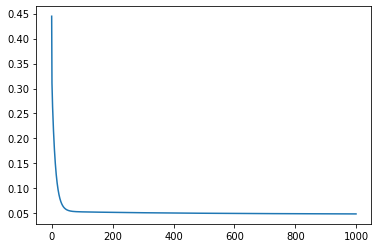

In [83]:
plt.plot(loss_history)